### 00-get-network

 - Used to retrieve road network from Open Street Maps
 - Step 2 of Methodology
 - Run one cell at a time

In [10]:
import osmnx as ox
import json
from shapely.geometry import shape, GeometryCollection, Polygon
import geopandas as gpd

#### 1 Check if OSM has pre-stored your desired region's boundaries
 - Change `place_name` to the desired region's name
 - If the `place_roi` displayed is the correct region, run step 2
 - If this is the incorrect region or only a singular point is displayed, go to step 3

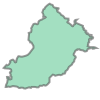

In [11]:
place_name = 'Rudraprayag, India'
place = ox.geocode_to_gdf(place_name)
place_roi = place.iloc[0,0]
place_roi

#### 2 Retrieving with `graph_from_place`

 - Update `filepath`

In [12]:
G = ox.graph_from_place(place_name, network_type='all')
filepath = "/home/jovyan/work/data/b-roads/roads-rudraprayag.gpkg"
ox.save_graph_geopackage(G, filepath=filepath)

#### 3 Upload boundaries from osm-boundaries, then `graph_from_polygon`

 - Do this if Open Street Maps does not store the boundary of your region
 - To get boundaries, download them from [osm-boundaries.com](https://osm-boundaries.com/Map). You will need to make a Open Street Maps account first.
    - When downloading, leave all the default settings
    - The download will be a .gz file - make sure to uncompress by clicking on it. When it is uncompressed, there should be no file extension
 - Update `bound_path` to be the location of the boundary geojson. Some sample boundaries are there already.
 - Update the `filepath`

In [13]:
bound_path = '/home/jovyan/work/data/b-boundaries/rudraprayag'

#read boundary
roi_file = gpd.read_file(bound_path)
roi = roi_file['geometry'].iloc[0]
roi_shape = shape(roi)

#retrieve network
G = ox.graph_from_polygon(roi_shape, network_type='all')
filepath = "/home/jovyan/work/data/b-roads/roads-rudraprayag-2.gpkg"
ox.save_graph_geopackage(G, filepath=filepath)

#### Sources

 - [Reading GEOJSON using geopandas](https://stackoverflow.com/questions/42753745/how-can-i-parse-geojson-with-python)
 - [Converting GEOJSON to shapely object](https://shapely.readthedocs.io/en/stable/manual.html#python-geo-interface)